In [11]:
import numpy as np  # Импорт библиотеки NumPy для работы с массивами и математическими операциями
import pandas as pd  # Импорт библиотеки Pandas для работы с данными в виде таблицы DataFrame
import pywt  # Импорт библиотеки PyWavelets для работы с вейвлет-преобразованиями
import torch  # Импорт библиотеки PyTorch для машинного обучения
import torch.nn as nn  # Импорт модуля нейронных сетей PyTorch
from scipy import signal  # Импорт модуля signal из библиотеки SciPy для работы с сигналами
from scipy import optimize  # Импорт модуля optimize из библиотеки SciPy для оптимизации
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации данных
from pathlib import Path  # Импорт класса Path из модуля pathlib для работы с путями к файлам и директориями
from IPython.display import Image  # Импорт функции Image для отображения изображений в IPython
from matplotlib.pyplot import figure  # Импорт функции figure из Matplotlib для настройки размера графика

from google.colab import drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
650000


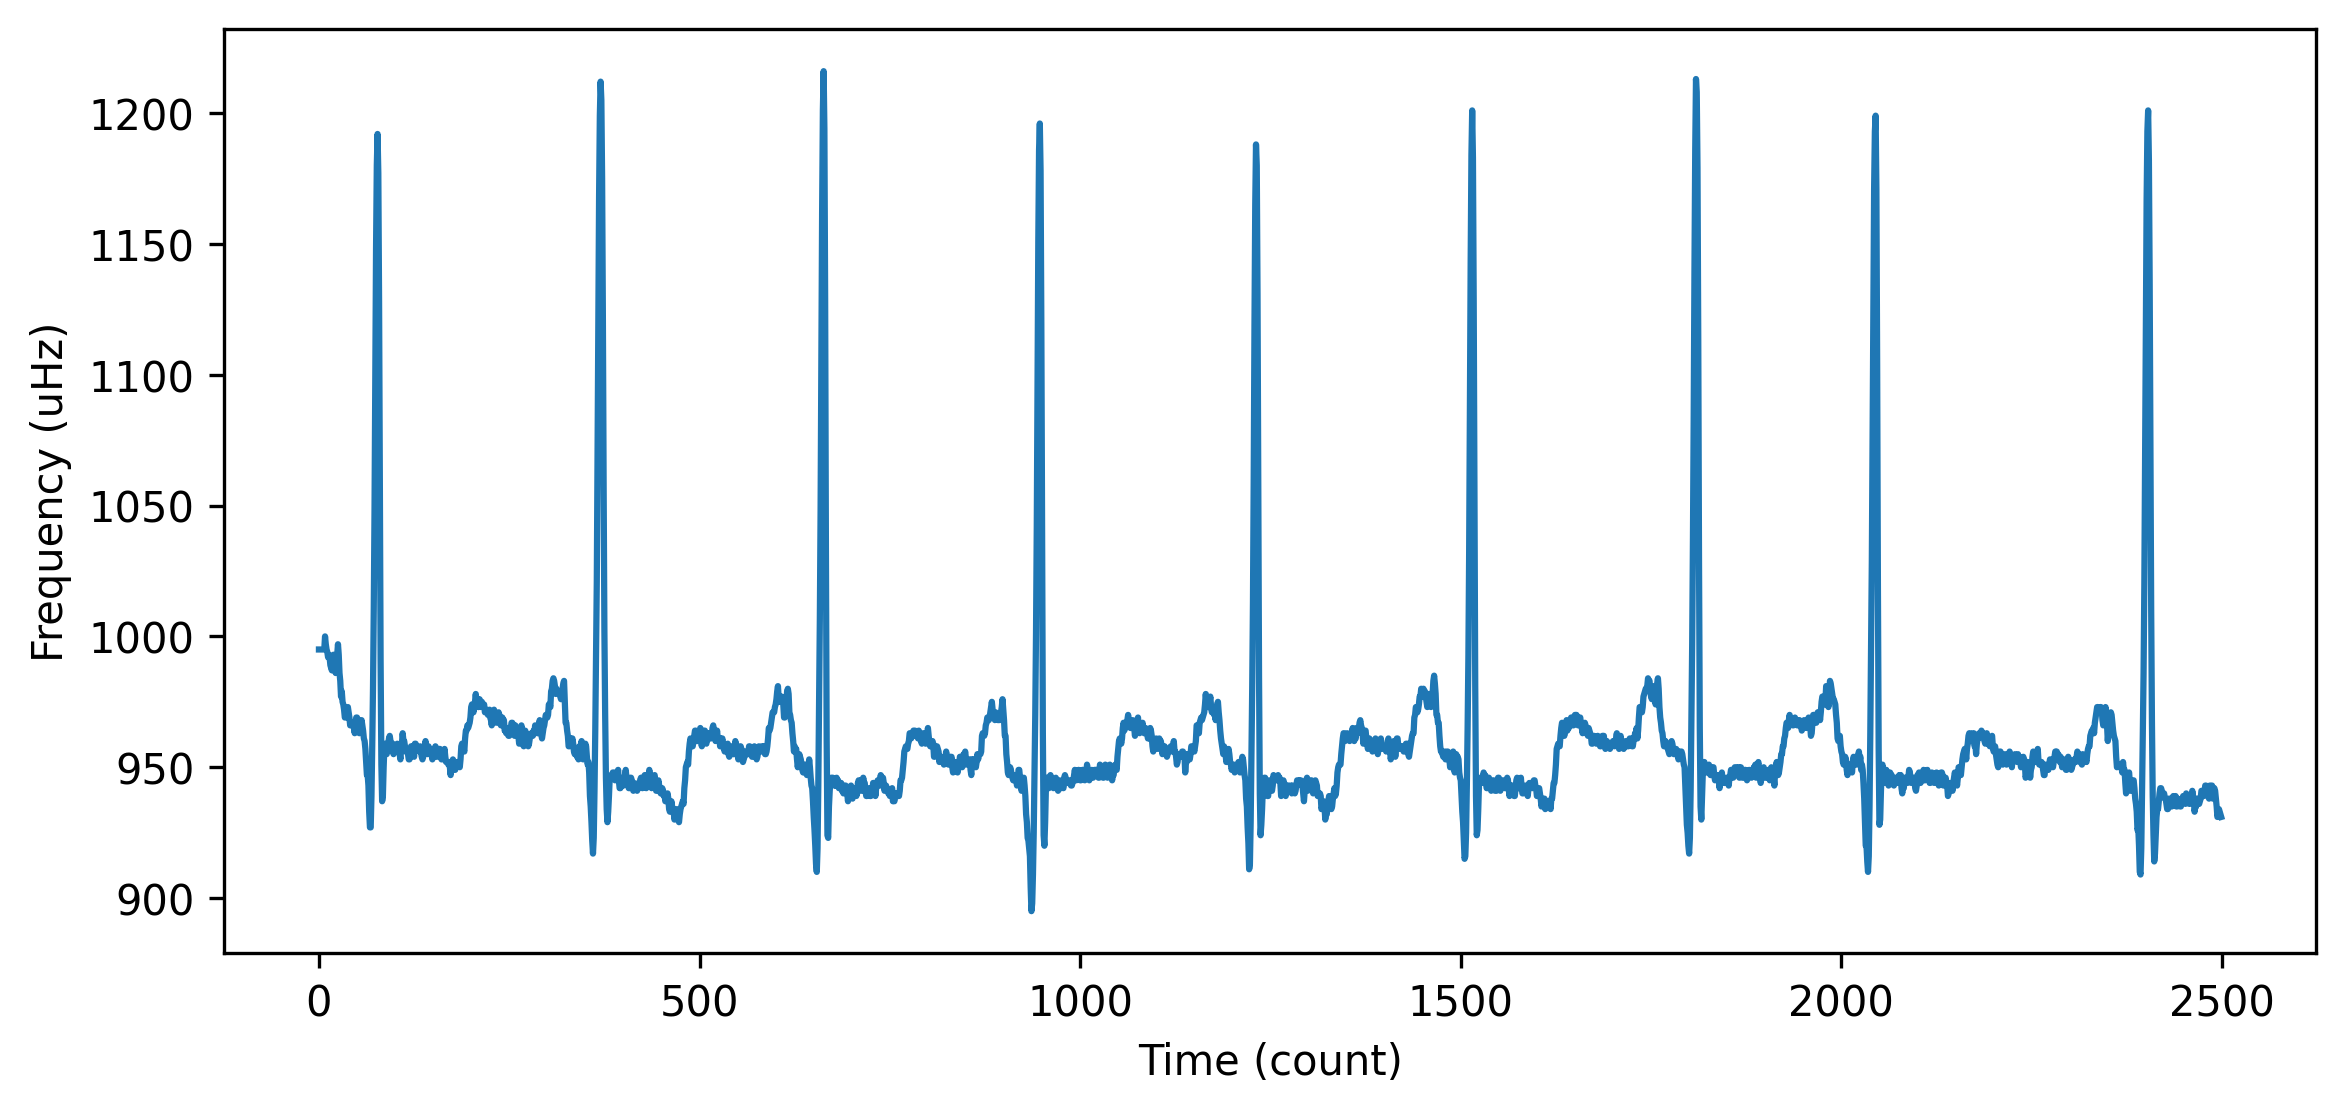

In [12]:
drive.mount('/content/gdrive') # Монтируем Google Диск
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Time series/100.csv' # Путь к файлу на Google Диске

data = pd.read_csv(file_path)  # Загрузка данных из CSV-файла в объект DataFrame
columns = data.columns  # Получение списка названий столбцов

signal = data[columns[1]]  # Извлечение сигнала из второго столбца данных
print(len(signal))  # Вывод длины сигнала

figure(figsize=(9, 4), dpi=300)  # Создание графика с размерами 9x4 дюйма и разрешением 300 dpi
plt.xlabel('Time (count)')  # Установка подписи оси X
plt.ylabel('Frequency (uHz)')  # Установка подписи оси Y
plt.plot(signal[0:2500])  # Построение графика для первых 2500 отсчетов сигнала


In [13]:
data.head(10)

,'sample #','MLII','V5'
0,0,995,1011
1,1,995,1011
2,2,995,1011
3,3,995,1011
4,4,995,1011
5,5,995,1011
6,6,995,1011
7,7,995,1011
8,8,1000,1008
9,9,997,1008


Text(0, 0.5, 'A (uHz)')

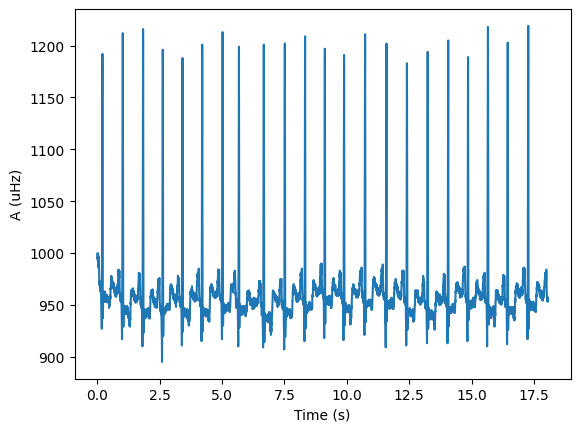

In [14]:
t = data[columns[0]][0:6500] / 360  # Преобразование времени из отсчетов в секунды
sig = signal[0:6500]  # Выбор подмножества сигнала для построения

plt.plot(t, sig)  # Построение графика сигнала
plt.xlabel('Time (s)')  # Установка подписи оси X
plt.ylabel('A (uHz)')  # Установка подписи оси Y


In [15]:
w=6
freq = np.linspace(1, 360/2, 3250)

In [16]:
widths = w * 360 / (2 * freq * np.pi)  # Вычисление ширин вейвлета для каждой частоты

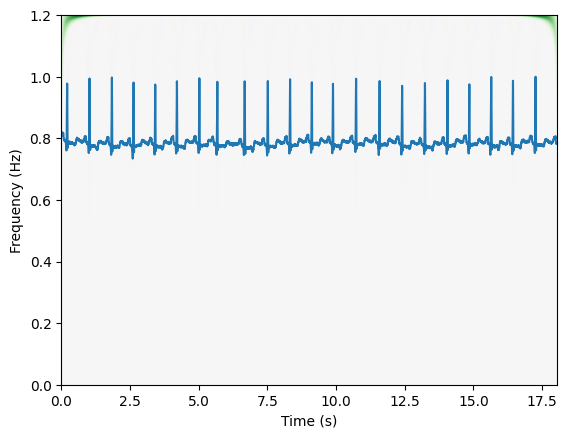

In [22]:
coefs, freqs = pywt.cwt(sig, widths, 'mexh')  # Вычисление непрерывного вейвлет-преобразования
plt.xlabel('Time (s)')  # Установка подписи оси X
plt.ylabel('Frequency (Hz)')  # Установка подписи оси Y
plt.imshow(
    coefs,
    extent=[0, t[6499], 0, 1.2],
    cmap="PRGn",
    aspect="auto",
    vmax=abs(coefs).max(),
    vmin=-abs(coefs).max(),
)  # Отображение вейвлет-преобразования в виде изображения

plt.plot(t, sig / np.abs(sig).max())  # Построение графика нормированного сигнала поверх изображения
#plt.plot(freqs)  # построить график частот

In [18]:
freqs*60

array([0.04363323, 0.04603716, 0.04844108, ..., 7.84917379, 7.85157771,
       7.85398163])

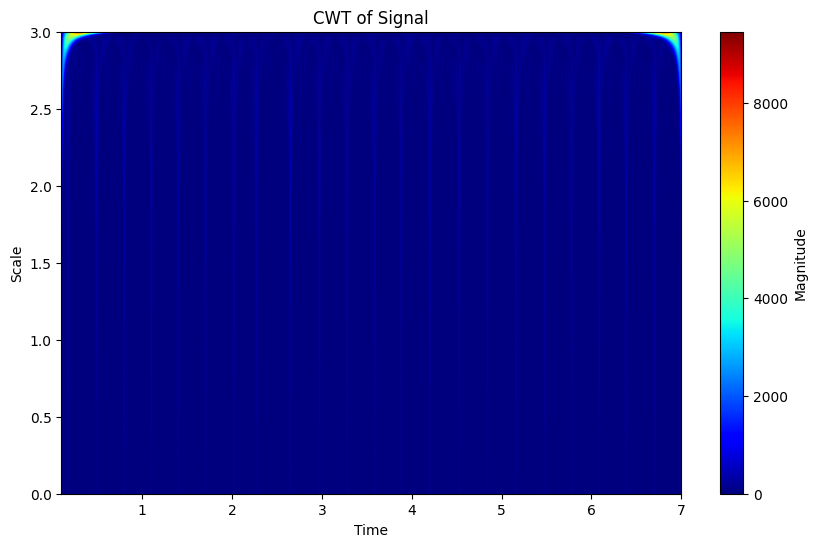

In [19]:
coefficients, frequencies = pywt.cwt(sig, widths, wavelet='mexh')  # Вычисление непрерывного вейвлет-преобразования
# Отображение результатов
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0.1, 7, 0, 3])
plt.colorbar(label="Magnitude")  # Добавление цветовой шкалы
plt.ylabel("Scale")  # Установка подписи оси Y
plt.xlabel("Time")  # Установка подписи оси X
plt.title("CWT of Signal")  # Установка заголовка графика
#plt.plot(frequencies*60)  # график частот
plt.show()